In [1]:
# from google.colab import drive
# drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# import sys
# sys.path.append('/content/drive/My Drive/Pyrain Proj') 

In [3]:
# from src.datasets.scaler import Scaler
#from src.benchmark.utils import local_time_shift, collate_fn, get_local_shift, is_vbl_const, get_var_name, get_vbl_name
from memmap_dataloader import Dataset




In [4]:
# from src.datasets.scaler import Scaler
from utils import local_time_shift, collate_fn, get_local_shift, is_vbl_const, get_var_name, get_vbl_name
from memmap_dataloader import Dataset

In [ ]:
# from google.colab import files

In [ ]:
# from google.colab import auth
# auth.authenticate_user()

In [ ]:
# !echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
# !curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
# !apt -qq update
# !apt -qq install gcsfuse

In [ ]:
# !mkdir aaai_test
# !gcsfuse aaai_release/imerg5625/imerg_5625__imerg5625bi.mmap/content/ aaai_test

In [5]:
from datetime import datetime
from collect_data import write_data_config

In [ ]:
"""
daterange_train=(datetime(2016,1,1,0).timestamp(),datetime(2016,12,31,23).timestamp())
daterange_test=(datetime(2018,1,6,0).timestamp(),datetime(2018,12,31,23).timestamp())
daterange_val=(datetime(2017,1,6,0).timestamp(),datetime(2017,12,31,23).timestamp())
sample_stride=3 #3h
increments = int(sample_stride * 60 * 60)

partition_conf = {
                        "train":
                            {"timerange": daterange_train,
                            "increment_s": increments},
                        "valid":
                            {"timerange": daterange_test,
                            "increment_s": increments},
                        "test":
                            {"timerange": daterange_val,
                            "increment_s": increments}
                    }

partition_type= "range" """

'\ndaterange_train=(datetime(2016,1,1,0).timestamp(),datetime(2016,12,31,23).timestamp())\ndaterange_test=(datetime(2018,1,6,0).timestamp(),datetime(2018,12,31,23).timestamp())\ndaterange_val=(datetime(2017,1,6,0).timestamp(),datetime(2017,12,31,23).timestamp())\nsample_stride=3 #3h\nincrements = int(sample_stride * 60 * 60)\n\npartition_conf = {\n                        "train":\n                            {"timerange": daterange_train,\n                            "increment_s": increments},\n                        "valid":\n                            {"timerange": daterange_test,\n                            "increment_s": increments},\n                        "test":\n                            {"timerange": daterange_val,\n                            "increment_s": increments}\n                    }\n\npartition_type= "range" '

In [6]:
dict_hyp={"sources":'simsat',"imerg":True,"grid":5.625,"sample_time_window":12,"sample_freq":3,
          "forecast_time_window":120,"forecast_freq":24,"inc_time":True,
          "data_paths":["/content/drive/My Drive/Pyrain Proj/aaai_release/era5625_aaai/era5625_aaai_era5625_aaai.dill",
                        "/content/drive/My Drive/Pyrain Proj/aaai_release/simsat5625/simsat5625_simsat5625.dill",
                        "/content/drive/My Drive/Pyrain Proj/aaai_release/imerg5625/imerg5625_imerg_5625.dill"]}
####first give the hyperparameters
###parameters according to the runbenchmark.py

    # parser.add_argument("--imerg", action='store_true', help='Predict precipitation from IMERG')
    # parser.add_argument("--grid", type=float, default=5.625, choices=[5.625, 1.4], help='Data resolution')
    # parser.add_argument("--sample_time_window", type=int, default=12, help="Duration of sample time window, in hours")
    # parser.add_argument("--sample_freq", type=int, default=3, help="Data frequency within the sample time window, in hours")
    # parser.add_argument("--forecast_time_window", type=int, default=120, help="Maximum lead time, in hours")
    # parser.add_argument("--forecast_freq", type=int, default=24, help="Forecast frequency")
    # parser.add_argument("--inc_time", action='store_true', help='Including hour/day/month in input')
    # # 
    # parser.add_argument('--config_file', default='./config.yml', type=FileType(mode='r'), help='Config file path')
    # parser.add_argument('--data_paths', nargs='+', help='Paths for dill files')
    # parser.add_argument('--norm_path', type=str, help='Path of json file storing  normalisation statistics')
    # parser.add_argument('--log_path', type=str, help='Path of folder to log training and store model')

    # # Model
    # parser.add_argument("--hidden_1", type=int, default=384, help="No. of hidden units (lstm).")
    # parser.add_argument("--hidden_2", type=int, default=32, help="No. of hidden units (fc).")
    # parser.add_argument("--no_relu", action='store_true', help='Not using relu on last network layer')
    # # Training
    # parser.add_argument("--gpus", type=int, default=-1, help="Number of available GPUs")
    # parser.add_argument('--distributed-backend', type=str, default='dp', choices=('dp', 'ddp', 'ddp2'), help='Backend for pytorch-lightning')
    # parser.add_argument('--use_amp', action='store_true', help='If true uses 16 bit precision')
    # parser.add_argument("--batch_size", type=int, default=32, help="Size of the batches")
    # parser.add_argument("--lr", type=float, default=5e-5, help="Learning rate")
    # parser.add_argument("--epochs", type=int, default=100, help="No. of epochs to train")
    # parser.add_argument("--num_workers", type=int, default=8, help="No. of dataloader workers")
    # parser.add_argument("--test", action='store_true', help='Evaluate trained model')
    # parser.add_argument("--load", type=str, help='Path of checkpoint directory to load')
    # parser.add_argument("--phase", type=str, default='test', choices=['test', 'valid'], help='Which dataset to test on.')
    # parser.add_argument("--auto_lr", action='store_true', help='Auto select learning rate.')
    # parser.add_argument("--auto_bsz", action='store_true', help='Auto select batch size.')



"""sample_conf={'lead_time_24': {'label': {'clbt': {'vbl': 'simsat5625/clbt', 't': array([-43200, -32400, -21600, -10800,      0]), 
'interpolate': 'nearest_past'}, 'lsm': {'vbl': 'era5625/lsm'}, 'orography': {'vbl': 'era5625/orography'}, 'lat2d': {'vbl': 'era5625/lat2d'}, 
'lon2d': {'vbl': 'era5625/lon2d'}, 'slt': {'vbl': 'era5625/slt'}}, 'target': {'precipitationcal': {'vbl': 'imerg5625/precipitationcal', 't': array([86400]),
 'interpolate': 'nearest_past'}}}, 'lead_time_48': {'label': {'clbt': {'vbl': 'simsat5625/clbt', 't': array([-43200, -32400, -21600, -10800,      0]), 
 'interpolate': 'nearest_past'}, 'lsm': {'vbl': 'era5625/lsm'}, 'orography': {'vbl': 'era5625/orography'}, 'lat2d': {'vbl': 'era5625/lat2d'}, 
 'lon2d': {'vbl': 'era5625/lon2d'}, 'slt': {'vbl': 'era5625/slt'}}, 'target': {'precipitationcal': {'vbl': 'imerg5625/precipitationcal', 't': array([172800]),
  'interpolate': 'nearest_past'}}}, 'lead_time_72': {'label': {'clbt': {'vbl': 'simsat5625/clbt', 't': array([-43200, -32400, -21600, -10800,      0]), 
  'interpolate': 'nearest_past'}, 'lsm': {'vbl': 'era5625/lsm'}, 'orography': {'vbl': 'era5625/orography'}, 'lat2d': {'vbl': 'era5625/lat2d'}, 
  'lon2d': {'vbl': 'era5625/lon2d'}, 'slt': {'vbl': 'era5625/slt'}}, 'target': {'precipitationcal': {'vbl': 'imerg5625/precipitationcal', 't': array([259200]),
   'interpolate': 'nearest_past'}}}, 'lead_time_96': {'label': {'clbt': {'vbl': 'simsat5625/clbt', 't': array([-43200, -32400, -21600, -10800,      0]),
    'interpolate': 'nearest_past'}, 'lsm': {'vbl': 'era5625/lsm'}, 'orography': {'vbl': 'era5625/orography'}, 'lat2d': {'vbl': 'era5625/lat2d'},
     'lon2d': {'vbl': 'era5625/lon2d'}, 'slt': {'vbl': 'era5625/slt'}}, 'target': {'precipitationcal': {'vbl': 'imerg5625/precipitationcal', 
     't': array([345600]), 'interpolate': 'nearest_past'}}}, 'lead_time_120': {'label': {'clbt': {'vbl': 'simsat5625/clbt', 
     't': array([-43200, -32400, -21600, -10800,      0]), 'interpolate': 'nearest_past'}, 'lsm': {'vbl': 'era5625/lsm'}, 'orography': {'vbl': 'era5625/orography'}, 
     'lat2d': {'vbl': 'era5625/lat2d'}, 'lon2d': {'vbl': 'era5625/lon2d'}, 'slt': {'vbl': 'era5625/slt'}}, 'target': {'precipitationcal': {'vbl': 'imerg5625/precipitationcal',
      't': array([432000]), 'interpolate': 'nearest_past'}}}}"""








datapath, partition_conf, sample_conf = write_data_config(dict_hyp)####second step, get some standard configuration dictionaries of the custom dataset
print("datapath",datapath)
print("partition_conf",partition_conf)
print("sample_conf",sample_conf)


train time, from 2017-12-01 00:00:00 to 2017-12-31 23:00:00
validation time, from 2018-12-06 00:00:00 to 2018-12-31 23:00:00
test time, from 2019-12-10 00:00:00 to 2019-12-31 23:00:00
datapath ['/content/drive/My Drive/Pyrain Proj/aaai_release/era5625_aaai/era5625_aaai_era5625_aaai.dill', '/content/drive/My Drive/Pyrain Proj/aaai_release/simsat5625/simsat5625_simsat5625.dill', '/content/drive/My Drive/Pyrain Proj/aaai_release/imerg5625/imerg5625_imerg_5625.dill']
partition_conf {'train': {'timerange': (1512086400.0, 1514761200.0), 'increment_s': 10800}, 'valid': {'timerange': (1544054400.0, 1546297200.0), 'increment_s': 10800}, 'test': {'timerange': (1575936000.0, 1577833200.0), 'increment_s': 10800}}
sample_conf {'lead_time_24': {'label': {'clbt': {'vbl': 'simsat5625/clbt', 't': array([-43200, -32400, -21600, -10800,      0]), 'interpolate': 'nearest_past'}, 'lsm': {'vbl': 'era5625/lsm'}, 'orography': {'vbl': 'era5625/orography'}, 'lat2d': {'vbl': 'era5625/lat2d'}, 'lon2d': {'vbl': 'e

In [7]:
dataset=Dataset(datapath=datapath,
                partition_conf=partition_conf,
                partition_type="range",
                sample_conf=sample_conf,
                partition_selected="valid"
                )

In [22]:
# <class 'memmap_dataloader.Dataset'>
# <class 'list'>
# <class 'dict'>
# dict_keys(['label', 'target', '__sample_modes__', '__sample_ts__'])
# dict_keys(['clbt', 'clbt__ts', 'lsm', 'orography', 'lat2d', 'lon2d', 'slt'])
# dict_keys(['precipitationcal', 'precipitationcal__ts'])
# <class 'numpy.ndarray'>

print(type(dataset))
print(type(dataset[0]))
print(type(dataset[0][0]))
print(dataset[0][0].keys())
print("label",dataset[0][0]["label"].keys())
print("target",dataset[0][0]["target"].keys())
print(type(dataset[0][0]["target"]["precipitationcal"]))
print("lead time",dataset[0][0]["target"]["precipitationcal__ts"])
print("target precipitationcal",dataset[0][0]["target"]["precipitationcal"].shape)#(1, 1, 32, 64) need to be reshape?
print(type(dataset[0][0]["label"]["clbt"]))
print(dataset[0][0]["label"]["clbt"].shape)
print("past time",dataset[0][0]["label"]["clbt__ts"])
print(dataset[0][0]["label"]["orography"].shape)
print(dataset[0][0]["label"]["lsm"].shape)
print(dataset[0][0]["label"]["lat2d"].shape)
print(dataset[0][0]["label"]["lon2d"].shape)
print(dataset[0][0]["label"]["slt"].shape)

print("lat2d",dataset[0][0]["label"]["lat2d"])
print("lon2d",dataset[0][0]["label"]["lon2d"])

<class 'memmap_dataloader.Dataset'>
<class 'list'>
<class 'dict'>
dict_keys(['label', 'target', '__sample_modes__', '__sample_ts__'])
label dict_keys(['clbt', 'clbt__ts', 'lsm', 'orography', 'lat2d', 'lon2d', 'slt'])
target dict_keys(['precipitationcal', 'precipitationcal__ts'])
<class 'numpy.ndarray'>
lead time [1.5445404e+09]
target precipitationcal (1, 1, 32, 64)
<class 'numpy.ndarray'>
(5, 3, 32, 64)
past time [1.5440652e+09 1.5440760e+09 1.5440868e+09 1.5440976e+09 1.5441084e+09]
(1, 32, 64)
(1, 32, 64)
(1, 32, 64)
(1, 32, 64)
(1, 32, 64)
lat2d [[[-87.1875 -87.1875 -87.1875 ... -87.1875 -87.1875 -87.1875]
  [-81.5625 -81.5625 -81.5625 ... -81.5625 -81.5625 -81.5625]
  [-75.9375 -75.9375 -75.9375 ... -75.9375 -75.9375 -75.9375]
  ...
  [ 75.9375  75.9375  75.9375 ...  75.9375  75.9375  75.9375]
  [ 81.5625  81.5625  81.5625 ...  81.5625  81.5625  81.5625]
  [ 87.1875  87.1875  87.1875 ...  87.1875  87.1875  87.1875]]]
lon2d [[[  0.      5.625  11.25  ... 343.125 348.75  354.375]
  

In [17]:
print("lat2d",dataset[100][0]["label"]["lat2d"])

lat2d [[[-87.1875 -87.1875 -87.1875 ... -87.1875 -87.1875 -87.1875]
  [-81.5625 -81.5625 -81.5625 ... -81.5625 -81.5625 -81.5625]
  [-75.9375 -75.9375 -75.9375 ... -75.9375 -75.9375 -75.9375]
  ...
  [ 75.9375  75.9375  75.9375 ...  75.9375  75.9375  75.9375]
  [ 81.5625  81.5625  81.5625 ...  81.5625  81.5625  81.5625]
  [ 87.1875  87.1875  87.1875 ...  87.1875  87.1875  87.1875]]]


In [ ]:
# from torch.utils.data import DataLoader
# dataloader=DataLoader(dataset,batch_size=32)
# #for i,sample in enumerate(dataloader):#i 795
  

In [ ]:
# dict_hyp2={"sources":'simsat_era',"imerg":False,"grid":5.625,"sample_time_window":12,"sample_freq":3,
#           "forecast_time_window":120,"forecast_freq":24,"inc_time":True,
#           "data_paths":["/content/drive/My Drive/Pyrain Proj/aaai_release/era5625_aaai/era5625_aaai_era5625_aaai.dill",
#                         "/content/drive/My Drive/Pyrain Proj/aaai_release/simsat5625/simsat5625_simsat5625.dill",
#                         "/content/drive/My Drive/Pyrain Proj/aaai_release/imerg5625/imerg5625_imerg_5625.dill"]}
# datapath, partition_conf, sample_conf = write_data_config(dict_hyp2)
# print("datapath",datapath)
# print("partition_conf",partition_conf)
# print("sample_conf",sample_conf)

# dataset=Dataset(datapath=datapath,
#                 partition_conf=partition_conf,
#                 partition_type="range",
#                 sample_conf=sample_conf,
#                 partition_selected="train"
#                 )

In [ ]:
# print(type(dataset))
# print(type(dataset[0]))
# print(type(dataset[0][0]))
# print(dataset[0][0].keys())
# print(dataset[0][0]["label"].keys())
# print(dataset[0][0]["target"].keys())
# print(type(dataset[0][0]["target"]["tp"]))
# print("lead time",dataset[0][0]["target"]["tp__ts"])
# print(dataset[0][0]["target"]["tp"].shape)#(1, 1, 32, 64) need to be reshape?
# print(type(dataset[0][0]["label"]["clbt"]))
# print(dataset[0][0]["label"]["clbt"].shape)
# print("past time",dataset[0][0]["label"]["clbt__ts"])
# print(dataset[0][0]["label"]["orography"].shape)
# print(dataset[0][0]["label"]["lsm"].shape)
# print(dataset[0][0]["label"]["lat2d"].shape)
# print(dataset[0][0]["label"]["lon2d"].shape)
# print(dataset[0][0]["label"]["slt"].shape)
# for key in dataset[0][0]["label"].keys():
#   print(key,dataset[0][0]["label"][key].shape)

In [ ]:
# print(dict_hyp2.keys())
# print(dict_hyp2["categories"])
# print(dict_hyp2["latlon"])

In [ ]:
from tqdm import tqdm

In [13]:
inputs, output, lead_times,one_hot=collate_fn(dataset, dict_hyp, None, None)####third step, get inouts and outputs
#dataset with XXXitems


"""
---------------------------------------------------------------------------

AssertionError                            Traceback (most recent call last)

<ipython-input-19-6c669bcea45e> in <module>()
----> 1 collate_fn(dataset, dict_hyp, None, None)

1 frames

/content/drive/My Drive/Pyrain Proj/utils.py in collate_fn(x_list, hparams, normalizer, time_shift)
    129     tmp = 'input_temporal_clbt' if 'clbt-0' in categories['input_temporal'] else 'input_temporal'
    130 
--> 131     for sample in x_list:
    132         output.append(np.concatenate([sample[0]['target'][v] for v in categories['output']], 1))
    133         lead_times.append(int(sample[0]['__sample_modes__'].split('_')[-1]))

/content/drive/My Drive/Pyrain Proj/memmap_dataloader.py in __getitem__(self, index)
    477         # Select sample
    478         assert max(index) < self.n_all_samples, "index {} out of range for dataset length {}".format(index,
--> 479                                                                                                      self.n_all_samples)
    480 
    481         # identify which sample type the index corresponds to MODE NOT TYPE

AssertionError: index [2300] out of range for dataset length 2300
"""



"""



"""

count 0


/content/drive/My Drive/Pyrain Proj/utils.py:111: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  leadtime[batch_i, :, lt // forecast_freq-1, :, :] = 1


'\n\n\n\n'

In [14]:
print("inputs",type(inputs))
print("output",type(output))
print("lead_times",type(lead_times))
print("inputs",inputs.size())
print("output",output.size())
print("lead_times",lead_times.size())
"""
inputs = [bsz, seq_len, channels, lat, lon] (constants are repeated per timestep)
output = [bsz, channels, lat, lon]
lead_time = [bsz]
"""

#print("lead_times",lead_times[:300])#120,24,48,72,96

inputs <class 'torch.Tensor'>
output <class 'torch.Tensor'>
lead_times <class 'torch.Tensor'>
inputs torch.Size([900, 5, 16, 32, 64])
output torch.Size([900, 1, 32, 64])
lead_times torch.Size([900])


'\ninputs = [bsz, seq_len, channels, lat, lon] (constants are repeated per timestep)\noutput = [bsz, channels, lat, lon]\nlead_time = [bsz]\n'

In [11]:
import matplotlib.pyplot as plt####visulaization test

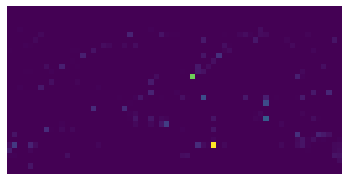

In [12]:
plt.imshow(output[11][0]) 
plt.axis('off') 
plt.show()

In [29]:
from metrics import compute_latitude_weighting,compute_weighted_mse
import torch

In [30]:
######metrics function test
lat=dataset[0][0]["label"]["lat2d"]
lon=dataset[0][0]["label"]["lon2d"]

weights_lat=compute_latitude_weighting(lat)
print(weights_lat)
##shape test
pred=torch.from_numpy(dataset[0][0]["target"]["precipitationcal"])#nparray type
true=torch.from_numpy(dataset[100][0]["target"]["precipitationcal"])

out=compute_weighted_mse(pred,true,weights_lat)
print("out",out)

[[[0.07704434 0.07704434 0.07704434 ... 0.07704434 0.07704434 0.07704434]
  [0.23039114 0.23039114 0.23039114 ... 0.23039114 0.23039114 0.23039114]
  [0.3815192  0.3815192  0.3815192  ... 0.3815192  0.3815192  0.3815192 ]
  ...
  [0.3815192  0.3815192  0.3815192  ... 0.3815192  0.3815192  0.3815192 ]
  [0.23039114 0.23039114 0.23039114 ... 0.23039114 0.23039114 0.23039114]
  [0.07704434 0.07704434 0.07704434 ... 0.07704434 0.07704434 0.07704434]]]
out tensor(0.9167)
